# 3rd Homework
## Theofanis Nitsos - p3352325

## Exercise 1
2, 4, 5

## Exercise 2
1, 3, 4

## Exercise 3
2, 3

## Exercise 4
1, 2

## Exercise 5
1, 2

## Exercise 6
1, 4

## Exercise 7
2

## Exercise 8
1

## Exercise 9
1, 3

## Exercise 10
1, 4

## Exercise 11
1, 4

## Exercise 12
1

## Exercise 13
(a) -> 1, (b) -> 2, (c) -> 2

## Exercise 14
1, 4

## Exercise 15
4, 2

## Exercise 16 
1, 2, 3

## Exercise 17
1, 2


## Exercise 18

Parameters for λ=0.00: [0.         0.17683325 0.         0.         0.         0.
 0.         0.         0.        ]
Parameters for λ=0.01: [0.         0.06774234 0.         0.         0.         0.
 0.         0.         0.        ]
Parameters for λ=0.10: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


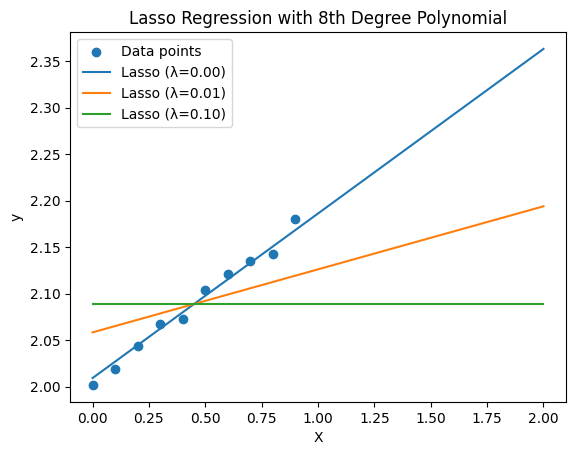

In [5]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Training set data
Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

# Polynomial degree
degree = 8

# Regularization parameter (lambda/alpha)
lambda_values = [0.001, 0.01, 0.1]

# Plot the original data
plt.scatter(X, y, label='Data points')

# Fit and plot the 8th degree polynomial for various lambda values
for alpha in lambda_values:
    model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=100000))
    model.fit(X, y)
    
    # Plot the curve resulting from the fit
    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, label=f'Lasso (λ={alpha:.2f})')

    # Output the estimates of the parameters
    params = model.named_steps['lasso'].coef_
    print(f'Parameters for λ={alpha:.2f}: {params}')

plt.title('Lasso Regression with 8th Degree Polynomial')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

For smaller values of $\lambda$ the line appears to follow the points while for larger values of $\lambda$ the fit is poor.

## Exercise 19

In [99]:
def generate_data(state):

    r = np.random.RandomState(state)
    # Construct X matrix [1, x1, x2, x1*x2]
    X = r.uniform(low=0,high=10,size=(30,1))

    # define theta
    theta = 2

    # define normal error
    n = r.normal(0,np.sqrt(64),len(X))

    # Define y using only x1, x2
    y = theta * (X.T) + n

    #prin X and y
    return(np.concatenate((X, y.reshape(-1,1), n.reshape(-1,1)), axis=1))

def yield_index(ds, num):
    return ds[num*30-30: num*30]

# Geneerate 50 datasets
data = np.empty((1,3))
for i in range(50):
    data = np.concatenate((data, generate_data(i)))
data = data[1:]

X_all = data[:,0]
y_all = data[:,1]
data[:,:5]

array([[ 5.48813504, 17.89175967,  6.91548959],
       [ 7.15189366,  8.36646716, -5.93732016],
       [ 6.02763376, 30.21330451, 18.15803699],
       ...,
       [ 2.51929002,  7.97437456,  2.93579451],
       [ 3.02920439, 15.41652257,  9.35811379],
       [ 0.76047628,  7.45203207,  5.93107951]])

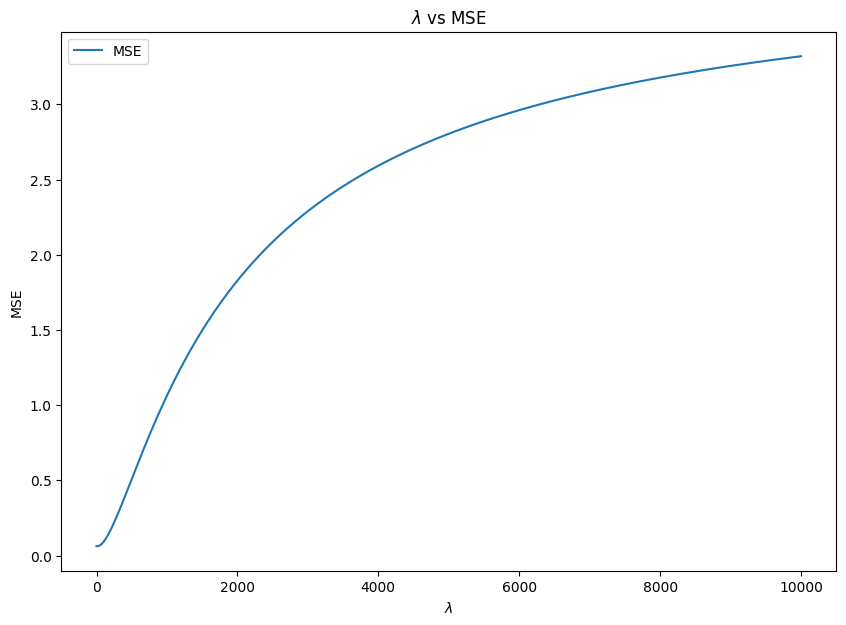

In [100]:
# initialize values
MSE = []
min, pos = 1, 0
min_range = []
lambda_range = np.arange(0, 10001, 0.1)
# start iteration for various values of lambda
for j, ld in enumerate(lambda_range):

    # Calculate theta
    theta = []
    for i in range(50):
        # Fetch the dataset located in position i+1 of the X_all table
        X = yield_index(X_all, i+1)
        y = yield_index(y_all, i+1)

        # Calculate scalar tables
        XX = X.dot(X.T) + ld 
        Xy = X.dot(y.T)

        # Append Theta
        theta.append(Xy/(XX))
        
    # append MSE 
    cur_MSE = np.power((np.full((50), 2) - theta),2).mean()
    MSE.append(cur_MSE)

    # keep track of the index with the lowest MSE
    if cur_MSE < min:
        min, pos = cur_MSE, j
        

    if j == 0:
        MSE_LS = cur_MSE
    elif cur_MSE <= MSE_LS:
        min_range.append(j)

# Plot the results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.plot(lambda_range, MSE, label='MSE')   
ax.set_title('$\lambda$ vs MSE')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('MSE')
ax.legend()

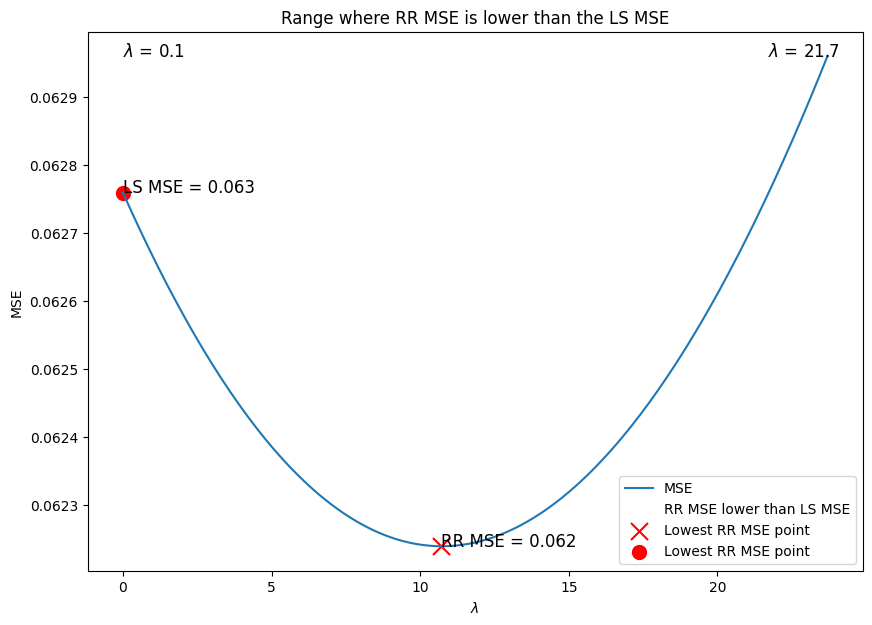

In [110]:
plot_range = int(min_range[-1]*1.1)
lambda_range_zoom, MSE_zoom = lambda_range[:plot_range], MSE[:plot_range]

# Plot the results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)

ax.plot(lambda_range_zoom, MSE_zoom, label='MSE')   
ax.axvspan(0, lambda_range_zoom[min_range[-1]], facecolor='w', alpha = 0.5, label='RR MSE lower than LS MSE')
ax.annotate(f"$\lambda$ = {lambda_range_zoom[min_range[0]]:.1f}", xy=(0,MSE_zoom[-1]), fontsize=12)
ax.annotate(f"$\lambda$ = {lambda_range_zoom[min_range[-1]]:.1f}", xy=(lambda_range_zoom[min_range[-1]],MSE_zoom[-1]), fontsize=12)
ax.scatter(lambda_range_zoom[pos], MSE_zoom[pos], c='r', label='Lowest RR MSE point', marker='x', s=150)
ax.annotate(f"RR MSE = {MSE_zoom[pos]:.3f}", xy=(lambda_range_zoom[pos], MSE_zoom[pos]), fontsize=12)
ax.scatter(0, MSE_zoom[0], c='r', label='Lowest RR MSE point', marker='o', s=100)
ax.annotate(f"LS MSE = {MSE_zoom[0]:.3f}", xy=(0,MSE_zoom[0]), fontsize=12)
ax.set_xlabel('$\lambda$')
ax.set_ylabel('MSE')
ax.set_title('Range where RR MSE is lower than the LS MSE')
ax.legend(loc='lower right')

The above examples captures the essense of the theory shown so far. Knowing that the LS estimator is a MVU estimator, we tried various values of lambda and plotted the change in the RR MSE. As expected, there are $\lambda$ s that have an MSE lower than the MVU. For large values of $\lambda$ tough the MSE is getting close to 1. 


## Exercise 20

For the expression $E_D [(f(x;D) - E[y|x])^2] $ to become 0 the estimator $f(x;D)$ has to be optimal and equal to the conditional expectation $E[y|x]$ almost everywhere. This occurs when we have a perfect model that accurately captures the true relationship, which In practice is almost impossible because of 
- noise
- model complexity and unkown distributions (designing a model that perfectly represents the true underlying function of $g(x)$)
- Limited data
- Computational constraints

## Exercise 21

#### (a)
$\int_{0}^{1} \int_{x^3}^{1} p(x,y) \,dy \,dx = \int_{0}^{1} \frac{4}{3}  (1-x^3) \,dx = [\frac{4}{3}x - \frac{4}{12}x^4]_{0}^{1} = 1$

#### (b)
$p_x(x) = \int_{x^3}^{1} p(x,y) \,dy = \frac{4}{3}  (1-x^3)$

#### (c)
$ p(y|x) = \frac{p(x,y)}{p_x(x)} = \frac{1}{1-x^3}$

#### (d)
$ E[y|x] = \int_{x^3}^{1} y \frac{1}{1-x^3} \,dy$

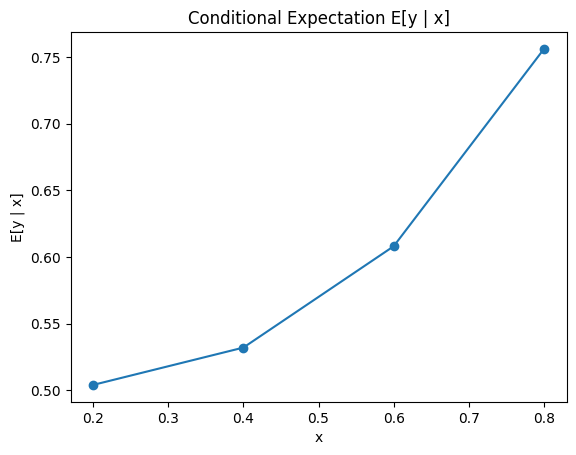

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Function to calculate conditional expectation E[y | x]
def conditional_expectation(x):
    integrand = lambda y: y / (1 - x**3)
    result, _ = quad(integrand, x**3, 1)
    return result

# Values of x
x_values = [0.2, 0.4, 0.6, 0.8]

# Calculate conditional expectations for each x
conditional_expectations = [conditional_expectation(x) for x in x_values]

# Plotting
plt.plot(x_values, conditional_expectations, marker='o')
plt.title('Conditional Expectation E[y | x]')
plt.xlabel('x')
plt.ylabel('E[y | x]')
plt.show()

## Exercise 22

In [113]:
import numpy as np
import scipy.io as sio
from scipy.stats import norm

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

import pandas as pd

from sklearn.metrics import mean_squared_error

# for creating a responsive plot
%matplotlib inline

# define variables
mu = np.ones((2, 1))
s = np.array([[4,3],[3,5]])

# Define variances
s_xy = s[0,1]
s_y = np.sqrt((s[0,0]))
s_x = np.sqrt((s[1,1]))
s_xy, s_y, s_x

(3, 2.0, 2.23606797749979)

#### (a)

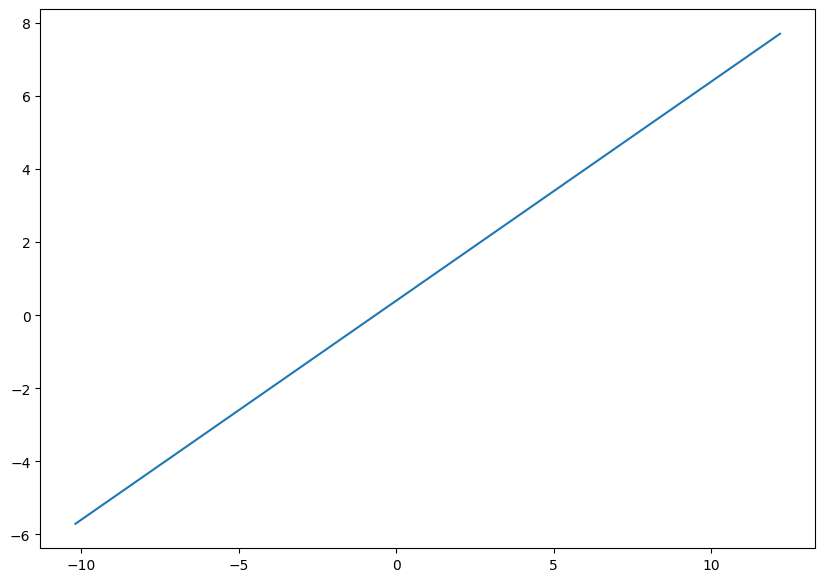

In [114]:
# Calculate alpha and coefficient
a = s_xy / (s_x * s_y)
c = a * (s_y / s_x)

def MSE(x_range):
    # Calculate E[y|x]
    return c * x_range - c * mu[1] + mu[0]

# Plot E[y|x]
fig, ax = plt.subplots(figsize=(10, 7))
x = np.linspace(mu[1] - 5 * s_x, mu[1] + 5 * s_x, 100)
ax.plot(x, MSE(x))
plt.show()

#### (a)

In [115]:
def generate_data(mu,s, size):
    # Yield 50 X, y pairs
    y, X = np.random.multivariate_normal(mu.flatten(), s, size).T
    e = np.random.normal(0,np.sqrt(0.01),len(X))
    y = y + e
    return(np.concatenate((X.reshape(-1,1), y.reshape(-1,1), e.reshape(-1,1)), axis=1))

def yield_index(ds, num, size):
    return ds[num*size-size: num*size]

In [116]:
size = 50
# Generate 100 datasets of size = 50
data = np.empty((1,3))
for i in range(100):
    data = np.concatenate((data, generate_data(mu, s, size)))
data = data[1:]

X_all = data[:,0]
y_all = data[:,1]

#### (c)

In [117]:
def perform_LS(X, y):
    # add ones to the transformed table for LS (since we have theta_0)
    X_new = np.append(np.ones((len(X),1)), X.reshape(-1,1), axis = 1)

    # Calculate the LS tables
    Xx_inv = np.linalg.inv(X_new.T.dot(X_new))
    Xy = X_new.T.dot(y)

    return Xx_inv.dot(Xy)


# Calculate \theta
theta = np.empty((1,2))
for i in range(100):
    # Fetch X and y for the given dataset number
    X = yield_index(X_all, i+1, size)
    y = yield_index(y_all, i+1, size)

    th = perform_LS(X, y)

    # Calculate and print coeff
    theta = np.concatenate((theta,th.reshape(1,2)))

theta = theta[1:]    
# theta = np.array(theta).reshape(-1,1)
theta.mean(axis=0)   

array([0.40511961, 0.59203614])

#### (d)

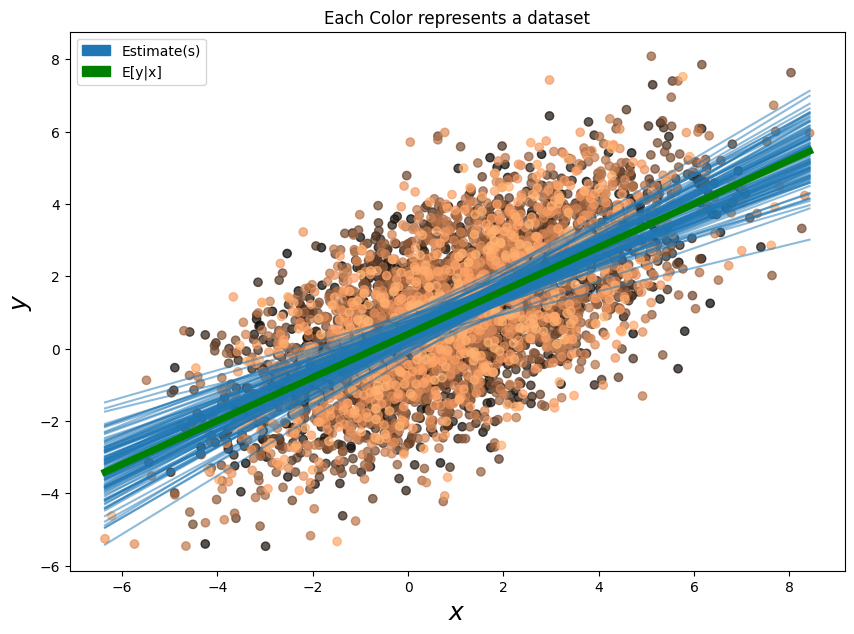

In [119]:
# Create 100 shades of color
colormap = plt.cm.copper #nipy_spectral, Set1,Paired  
colorst = [colormap(i) for i in np.linspace(0, 0.9,100)] 

# Create patches for the legend
patches = [ mpatches.Patch(color = 'C0', label = 'Estimate(s)'), mpatches.Patch(color = 'green', label = 'E[y|x]') ]

# Define plot range
range_x = np.linspace(X_all.min(), X_all.max(), 100)

#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
for i in range(100):
    ax.plot(range_x, theta[i][0] + theta[i][1] * range_x, c='C0',alpha = 0.5)
    ax.scatter(yield_index(X_all, i+1, size),yield_index(y_all, i+1, size), c=[colorst[i]]*50,marker='o', alpha = 0.7)
ax.plot(range_x, MSE(range_x), c='green',alpha = 1, lw=5)
ax.set_ylabel('$y$', fontsize=18)
ax.set_xlabel('$x$', fontsize=18)
ax.set_title('Each Color represents a dataset')
ax.legend(handles = patches, loc = 'upper left')

#### (e)

In [120]:
size = 5000

# Generate 100 datasets
data = np.empty((1,3))
for i in range(100):
    data = np.concatenate((data, generate_data(mu, s, size)))
data = data[1:]

X_all = data[:,0]
y_all = data[:,1]

In [121]:
# Calculate \theta
theta = np.empty((1,2))
for i in range(100):
    # Fetch X and y for the given dataset number
    X = yield_index(X_all, i+1, size)
    y = yield_index(y_all, i+1, size)

    th = perform_LS(X, y)

    # Calculate and print coeff
    theta = np.concatenate((theta,th.reshape(1,2)))

theta = theta[1:]    
theta.mean(axis=0)  

array([0.4021135 , 0.59857201])

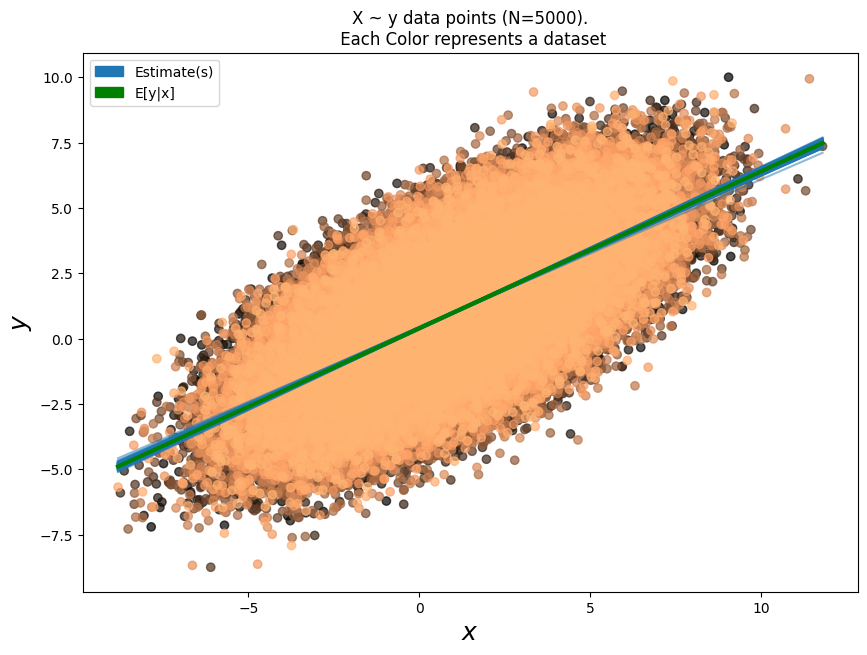

In [122]:
# Define plot range
range_x = np.linspace(X_all.min(), X_all.max(), 100)

#plot X data
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
for i in range(100):
    ax.plot(range_x, theta[i][0] + theta[i][1] * range_x, c='C0',alpha = 0.5)
    ax.scatter(yield_index(X_all, i+1, size),yield_index(y_all, i+1, size), c=[colorst[i]]*size,marker='o', alpha = 0.7)
ax.plot(range_x, MSE(range_x), c='green',alpha = 1, lw=3)
ax.set_ylabel('$y$', fontsize=18)
ax.set_xlabel('$x$', fontsize=18)
ax.set_title('X ~ y data points (Ν=5000).\n Each Color represents a dataset')
_ = ax.legend(handles = patches, loc = 'upper left')

The optimal MSE depends on the variance term and the Bias term. Increase in the number of samples reduces the MSE. As we know for a fixed number of points N in all data sets D, it is not possible to reduce both terms simultaneously. By increasing the number of samples the Bias term decreases since with more points each estimation will be closer to the optimal estimate and, second, the variance of each estimator is closer to the mean value. That way we decreased the MSE, decreasing both terms.

## Exercise 23

#### (a)

In [123]:
# Generate 100 pairs
data = np.empty((1,3))
data = np.concatenate((data, generate_data(mu, s, 100)))
data = data[1:]

X_100 = data[:,0]
y_100 = data[:,1]

#### (b)

In [124]:
# Calculate and print coeff
theta_100 = perform_LS(X_100,y_100)

print(f"y = {theta_100[0]:.2f} + {theta_100[1]:.2f} x")

y = 0.32 + 0.59 x


#### (c)

In [125]:
# Generate 50 pairs
data = np.empty((1,3))
data = np.concatenate((data, generate_data(mu, s, 50)))
data = data[1:]

X_50 = data[:,0]
y_50 = data[:,1]
data[:5]

# Print coeff
print(f"y = {theta_100[0]:.2f} + {theta_100[1]:.2f} x")

y = 0.32 + 0.59 x


#### (d)

In [126]:
# determine estimates based on linear estimate
y_hat = theta_100[0] + theta_100[1] * X_50

# determine estimates based on optimal estimate
y_bar = MSE(X_50)

print(f"MSE for the Linear estimates:\t {mean_squared_error(y_50,y_hat):.2f}\n\
MSE for the optimal estimates:\t {mean_squared_error(y_50,y_bar):.2f}")


MSE for the Linear estimates:	 1.75
MSE for the optimal estimates:	 1.76


#### (e)
We can use the Mean Squared Error (MSE) on the estimates vs the actual values. to quantify the performance of the two estimators. As we can see in this example, the Linear estimates derived a higher MSE compared to the optimal one. Another metric that could potentially be used is the MAE.

## Exercise 24

In [127]:
np.random.seed(42)
# Define Z
X = np.random.random(100)
y = []
for i in X:
    y.append(np.random.uniform(i**3,1))
y = np.array(y)

# Define z
z = np.concatenate((X.reshape(-1,1), y.reshape(-1,1)), axis=1)

#### (a)

In [128]:
# Calculate the optimal MSE for each x.
E_xy = (1 - np.power(X, 6))/ (2 * (1 - np.power(X, 3)))

# calculate the optimal MSE of X
mean_squared_error(y, E_xy)

0.05916528520380385

#### (b)

In [131]:
# Calculate mu, s
mu = np.array([[X.mean()],[y.mean()]])
s = np.zeros((2,2))
for i in range(len(z)):
    s += ((mu - z[i].reshape(-1,1)).dot((mu - z[i].reshape(-1,1)).T))
s = s/len(z)

print('mean',mu)
print('var',s)

mean [[0.47018074]
 [0.61565022]]
var [[0.08761495 0.03522882]
 [0.03522882 0.07619404]]


#### (c)

In [132]:
# Define variances
s_xy = s[0,1]
s_y = np.sqrt((s[0,0]))
s_x = np.sqrt((s[1,1]))

def MSE(x_range):

    # Calculate E[y|x]
    return c * x_range - c *mu[0] + mu[1]

# calculate alpha
a = s_xy/(s_x * s_y)

# coef
c = a * (s_y /(s_x))

# calculate the optimal MSE of X
mean_squared_error(y, MSE(X))

0.06234724804068661

#### (d)
The results from (a) and (c) indicated that the optimal MSE fits the data better.  